In [47]:
import numpy as np
import cv2 as cv
import skimage.io as io
import matplotlib.pyplot as plt
import os
%matplotlib inline
from skimage.color import rgb2gray
from skimage.exposure import histogram
from matplotlib.pyplot import bar
from skimage.filters import gaussian
from skimage.feature import canny
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin

from commonfunctions import *
from skimage.measure import find_contours

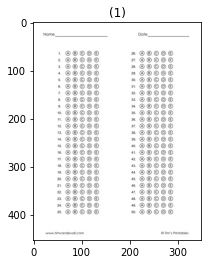

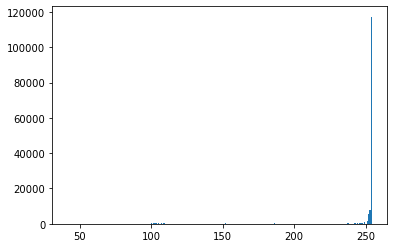

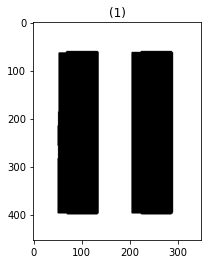

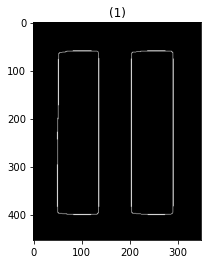

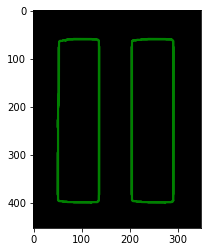

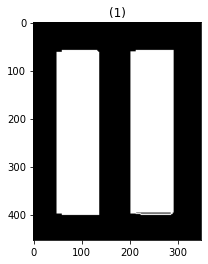

In [196]:
image = io.imread("imgs/5.jpg")
show_images([image])
orignal_image = image.copy()
#orignal_image = resize(orignal_image, (500 , 500))
#orignal_image = orignal_image.astype(float)

gray_image = rgb2gray(orignal_image)*255
showHist(gray_image)
threshold = 200
gray_image = gray_image > threshold
dia_SE = np.ones((16,16))
#Bluured_image  = gaussian(gray_image, sigma=1,  mode='nearest')
opening = binary_dilation(binary_erosion(gray_image , dia_SE),dia_SE)
closing = binary_erosion(binary_dilation(opening , dia_SE),dia_SE)
show_images([closing])
edged = canny(closing, sigma=3)
# show the original image and the edge detected image
show_images([edged])


bounding_boxes = find_contours(edged,0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(edged, cmap=plt.cm.gray)
blank = np.zeros(gray_image.shape)

for contour in bounding_boxes:
    x_diff = contour[:, 1].max() - contour[:, 1].min()
    y_diff = contour[:, 0].max() - contour[:, 0].min()
# #     print(x_diff,y_diff)
#     if( x_diff >= image.shape[1] // 5  or y_diff >= image.shape[0]//5 ):
# #       print('hi')
    for i in contour[:, 0]:
        for j in contour[:, 1]:
            #print(i,j)
            blank[int(i)][int(j)]=1
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2,color='green')
show_images([blank])

In [ ]:
for i in range()